# Grover's Algorithm

## Imports and installs

In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-u6rzpy55
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-u6rzpy55
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 85ba91fef057a425cd2cb7ce58999e9334b75f4c
  Preparing metadata (setup.py) ... done


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import vector2latex

## Function definitions

In [4]:
# Initialize Circuit
def initCircuit(qc, qbits):
  for q in qbits:
      qc.h(q)
  return qc

In [5]:
n = 2
grover = QuantumCircuit(n)

In [6]:
grover = initCircuit(grover, [0,1])
grover.draw()
# Define oracle
grover.cz(0,1)

In [7]:
grover.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [8]:
# Diffusion
grover.h([0,1])
grover.z([0,1])
grover.cz(0,1)
grover.h([0,1])


In [9]:
grover.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [10]:
# verify correctness of statevector and run on Aer
sim = Aer.get_backend('aer_simulator')
grover_simul = grover.copy()
grover_simul.save_statevector()
qob = assemble(grover_simul)
result = sim.run(qob).result()
state_vector = result.get_statevector()
vector2latex(state_vector, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

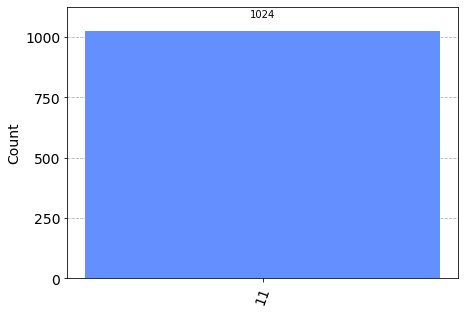

In [11]:
grover.measure_all()

aer = Aer.get_backend('aer_simulator')
qobj = assemble(grover)
result = aer.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)